Spike times: [  36.9   71.1  105.3  139.5  173.7] ms


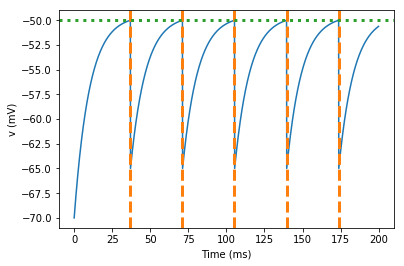

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

# Descrição dos parâmetros do modelo

Cm = 2*nfarad # capacitância da membrana
Rm = 5e6*ohm # resistência da membrana
El = -70*mV # potencial de equilíbrio da membrana
Vl = -50*mV # valor limiar de tensão de emissão de disparo
vr = -65*mV # valor de tensão de repouso após 'resetagem'
I = 4.1*namp # corrente constante aplicada.

# Descrição do modelo neurônio integra-e-dispara com vazamento (LIF) no caso de uma corrente constante

eqs = '''
dv/dt = ((El - v) / (Cm*Rm)) + (I/Cm) : volt
'''

# O núcleo de toda simulação é o NeuronGroup, um grupo de neurônios que compartilham as mesmas equações que definem suas 
# propriedades. A especifição mínima contém o número de neurônios (1, na presente simulação) e a descrição do modelo (eqs)

# O método de iteração escolhido com a palavra-chave "method" é o Euler forward com passo de tempo de 0.1 ms 

G = NeuronGroup(1, eqs, threshold='v>Vl', reset= 'v=vr',  method='euler', dt= 0.1*ms )

G.v = -70*mV # valor inicial ou potencial de equilíbrio da membrana
statemon = StateMonitor(G, 'v', record=0) # monitor de potencial
spikemon = SpikeMonitor(G) # monitor de spikes

# tempo de simulação
run(200*ms)

# plotagem
plot(statemon.t/ms, statemon.v[0]/mV)
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(-50, ls=':', c='C2', lw=3)
xlabel('Time (ms)')
ylabel('v (mV)')
print("Spike times: %s" % spikemon.t[:])

